In [1]:
# fetching thee data from the mnist 
from keras.datasets import mnist
(train_x,train_y),(test_x,test_y)=mnist.load_data()
# showing the shape
print("x_train:"+str(train_x.shape))
print("y-train:"+str(train_y.shape))
print("x_test:"+str(test_x.shape))
print("y_test:"+str(test_y.shape))

2025-11-18 11:17:49.542349: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2025-11-18 11:17:49.548325: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-11-18 11:17:49.988305: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-11-18 11:17:51.851137: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off,

x_train:(60000, 28, 28)
y-train:(60000,)
x_test:(10000, 28, 28)
y_test:(10000,)


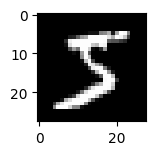

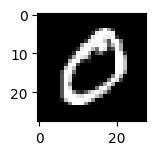

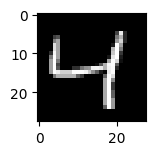

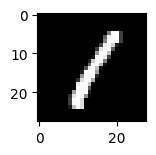

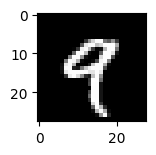

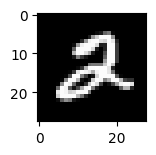

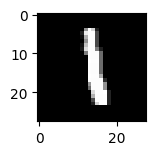

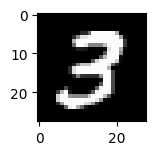

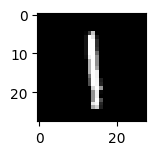

In [2]:
# plotting the dataset
from matplotlib import pyplot as plt
for i in range(9):
    plt.subplot(330+1+i)
    plt.imshow(train_x[i],cmap=plt.get_cmap('gray'))
    plt.show()



In [3]:
# trianing the binary classifier first 
# binary means which can only calssufy to two calsses like true ir false 

In [4]:
train_x_flat = train_x.reshape(train_x.shape[0], -1)
test_x_flat  = test_x.reshape(test_x.shape[0], -1)

In [5]:
y_train_5=(train_y==5)
y_test_5=(test_y==5)

In [6]:
print(y_train_5)
print(y_train_5.shape)

[ True False False ...  True False False]
(60000,)


In [7]:
print(y_test_5)
print(train_x_flat.shape)

[False False False ... False  True False]
(60000, 784)


In [8]:
# importing models SGd
from sklearn.linear_model  import SGDClassifier
clf=SGDClassifier()
clf.fit(train_x_flat,y_train_5)



,loss,'hinge'
,penalty,'l2'
,alpha,0.0001
,l1_ratio,0.15
,fit_intercept,True
,max_iter,1000
,tol,0.001
,shuffle,True
,verbose,0
,epsilon,0.1
,n_jobs,None


In [9]:
# getting some random test set
import numpy as np
random_index=np.random.randint(0,len(test_x))
image = test_x[random_index]
label = test_y[random_index]
# lableing 
print("Label:", label)
print("Image shape:", image.shape)

Label: 7
Image shape: (28, 28)


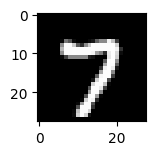

In [10]:
# ploting the image
from matplotlib import pyplot
plt.subplot(3,3,1)
plt.imshow(image,cmap=plt.get_cmap('gray'))
plt.show()

In [11]:
image_plt=image.reshape(1,-1)
clf.predict(image_plt)

array([False])

In [12]:
# cross validation 
# for the 
from sklearn.model_selection import cross_val_score
cross_val_score(clf,train_x_flat,y_train_5,cv=3,scoring="accuracy")

array([0.96265, 0.96655, 0.96365])

In [13]:
cross_val_score(clf,train_x_flat,y_train_5,cv=3,scoring="f1")

array([0.78266371, 0.71780303, 0.77957501])

In [14]:
# only accuracy is not the way to measure the perfomance in imbalanced class so confusion matris is needed

# but we need to ahve the predictions score
# so
from sklearn.model_selection import cross_val_predict
y_predicted=cross_val_predict(clf,train_x_flat,y_train_5,cv=3)

In [15]:
print(y_predicted)

[ True False False ...  True False False]


In [16]:
# now confution matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5,y_predicted)

array([[53746,   833],
       [ 1320,  4101]])

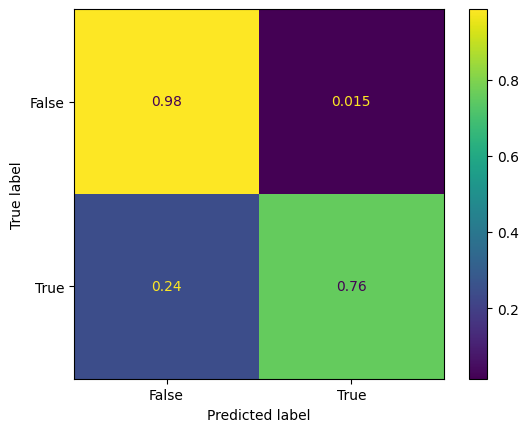

In [17]:
# saving the confusion matrices
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay.from_predictions(y_train_5, y_predicted, normalize='true')
disp.figure_.savefig("confusion_matrix.png")


In [18]:
# preinting the diffrent score to understand 
from sklearn.metrics  import precision_score , recall_score ,f1_score 
print(precision_score(y_train_5, y_predicted))
print(recall_score(y_train_5, y_predicted))
print(f1_score(y_train_5, y_predicted))

0.8311714633157682
0.7565024903154399
0.7920811202317721


In [19]:
# unsderstanding  about the decision the decision threshold\
y_scores=cross_val_predict(clf,train_x_flat,y_train_5,cv=3,method="decision_function")
print("score calcualted")
# importing the curve

score calcualted


In [20]:

from sklearn.metrics import precision_recall_curve
precision, recall,thresholds=precision_recall_curve(y_train_5,y_scores)

print("done")

done


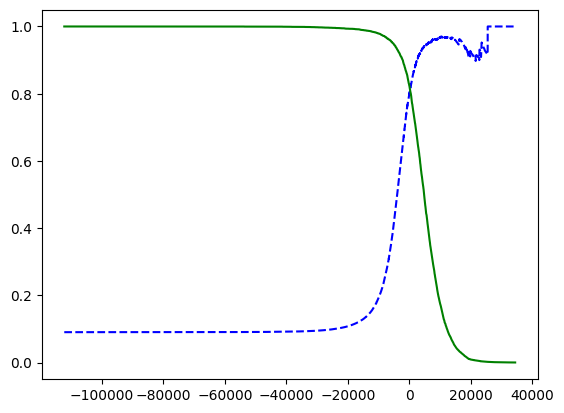

In [21]:
# ploting the decision theresholds and recall, precision  for finding the best thresholds
def plot_decision_theresholds(precision,recall,thresholds):
    plt.plot(thresholds,precision[:-1],'b--',label='precision')
    plt.plot(thresholds,recall[:-1],'g-',label='recall')
plot_decision_theresholds(precision,recall,thresholds)
plt.show()

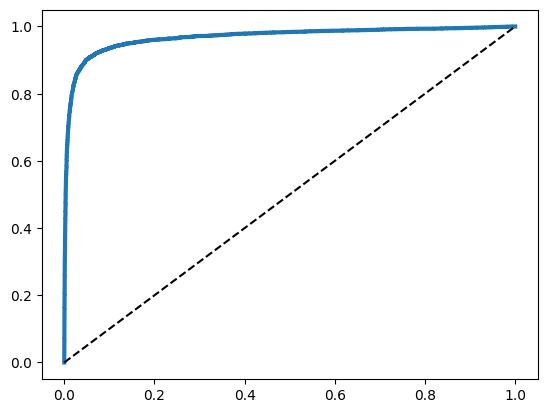

In [22]:
# understanding the ROC curve
# calculating the fpr and tpr and thresholds
from sklearn.metrics import roc_curve
fpr,tpr,thresholds=roc_curve(y_train_5,y_scores)
# stands for the receiver operating characteristic (ROC)
def plot_roc(fpr,tpr,label=None):
    plt.plot(fpr,tpr,linewidth=3,label=label)
    plt.plot([0,1],[0,1],'k--')

# main function
plot_roc(fpr,tpr)
plt.show()

In [23]:
# calculating the area under the curve 
from sklearn.metrics import roc_auc_score
print(roc_auc_score(y_train_5,y_scores))# good classifier has auc =1
# where as random classifier has the auc =0.5


0.9683709847718694


In [24]:
# training the different mdel 
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(random_state=42)
y_prob=cross_val_predict(rfc,train_x_flat,y_train_5,method="predict_proba")



[[0.14 0.86]
 [0.99 0.01]
 [0.98 0.02]
 ...
 [0.01 0.99]
 [0.96 0.04]
 [0.96 0.04]]


In [26]:
y_prob_score=y_prob[:,1]
print(y_prob_score)
fpr_forest,tpr_forest,theresholds_forest=roc_curve(y_train_5,y_prob_score)

[0.86 0.01 0.02 ... 0.99 0.04 0.04]


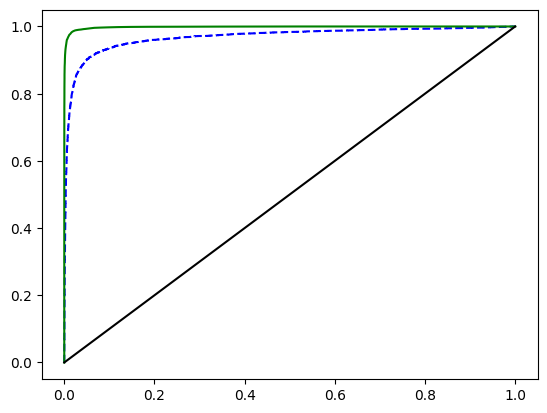

In [34]:
# now drawing the ROC_AUC curve 

def plot_roc_forest(fpr_forest,tpr_forest):
    plt.plot(fpr,tpr,'b--',label="SGD")
    plt.plot(fpr_forest,tpr_forest,'g-', label="Forest")
    plt.plot([0,1],[0,1],'k-')

plot_roc_forest(fpr_forest,tpr_forest)
plt.show()


In [36]:
 # calculating the area under the curve in thee 
print(roc_auc_score(y_train_5,y_prob_score))

0.998402186461512


In [44]:
# this looks more accurate then the previous
# immplemtingn the onevs all classfifier
print()
clf.fit(train_x_flat,train_y)



,loss,'hinge'
,penalty,'l2'
,alpha,0.0001
,l1_ratio,0.15
,fit_intercept,True
,max_iter,1000
,tol,0.001
,shuffle,True
,verbose,0
,epsilon,0.1
,n_jobs,None


In [49]:
print(clf.predict(image_plt))

[7]


In [50]:
print(clf.classes_)


[0 1 2 3 4 5 6 7 8 9]


In [55]:
print("Tne NO is ",clf.classes_[clf.predict(image_plt)])

Tne NO is  [7]


In [ ]:
# This is the finalmodel
